<a href="https://colab.research.google.com/github/akipips/simosaka_final/blob/master/%E5%95%8F%E9%A1%8C1/problem1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
#dataset5

n = 200
x = 3 * (np.random.rand(n, 4) - 0.5)
x = np.hstack([x, np.ones((n, 1))])
W = np.array([[2, -1, 0.5], [-3, 2, 1], [1, 2, 3]])
x_with_error = np.dot(np.hstack([x[:, 0:2].reshape((n, 2)), np.ones((n, 1))]), W.T) + 0.5 * np.random.randn(n, 3)
maxlogit, y = x_with_error.max(axis=1), x_with_error.argmax(axis=1)

steepest gradient method

In [12]:
dim = 5
lam = 2
alpha = 0.04
class_num = 3
w = np.ones((dim, 3))
stop=1e-6

arr_sgm = []
step = 0
while 1:
    grad = np.zeros_like(w)
    wTw = lam * np.trace(np.dot(w.T, w))
    L = 0
    for i in range(n):
        yi = y[i].reshape((1, 1))
        xi = x[i].reshape((dim, 1))
        c = np.max(np.dot(w.T, xi))  
        exps = np.exp(np.dot(w.T, xi) - c)
        softmax = exps / np.sum(exps)
        for j in range(class_num):
            if j == yi:
                grad[:, yi] += ((softmax[yi] - 1).reshape((1, 1)) * xi).reshape((5, 1, 1))
            else:
                grad[:, j] += (softmax[j].reshape((1, 1)) * xi).reshape((5,))
        L -= (np.log(softmax[yi]))
    grad /= n
    grad += 2 * lam * w
    L /= n
    wTw += L
    arr_sgm.append(wTw.item())
    print(str(step).rjust(4) + ": " + str(np.linalg.norm(grad)).ljust(22) + " " + str(wTw.item()))
    if (np.linalg.norm(grad) < stop):
        break
    w -= alpha * grad
    step += 1

print("step:" + str(step))
print(w)


   0: 15.501873780140587     31.098612288668107
   1: 13.02135246654659      22.255343667306843
   2: 10.937754622635081     16.015744412696975
   3: 9.187565347406574      11.613228397798142
   4: 7.7174333582870895     8.506912941553251
   5: 6.482544615800757      6.315165371232316
   6: 5.445256192294318      4.768715424758514
   7: 4.573948746127591      3.6775727195116374
   8: 3.8420626228576933     2.9076846605634916
   9: 3.227288200617895      2.3644669126353195
  10: 2.7108857978985217     1.9811829511547163
  11: 2.2771144111115973     1.7107449836817843
  12: 1.912751866779497      1.5199288936366193
  13: 1.606691759908205      1.3852924515126368
  14: 1.3496048909552847     1.2902953057174855
  15: 1.1336548800958781     1.2232669175247985
  16: 0.9522592891456869     1.1759727836632115
  17: 0.7998889688572706     1.1426027957279654
  18: 0.6718995146540996     1.1190574490733114
  19: 0.5643896927300737     1.1024442072501326
  20: 0.4740825206618712     1.090722147355

newton method 

In [13]:
w = np.ones((dim, 3))
step = 0
arr_newton = []
while 1:
    hessian = [np.zeros((5, 5)), np.zeros((5, 5)), np.zeros((5, 5))]
    grad = np.zeros_like(w)
    wTw = lam * np.trace(np.dot(w.T, w))
    L = 0
    for i in range(n):
        yi = y[i].reshape((1, 1))
        xi = x[i].reshape((5, 1))
        c = np.max(np.dot(w.T, xi))  
        exps = np.exp(np.dot(w.T, xi) - c)
        softmax = exps / np.sum(exps)
        for j in range(class_num):
            if (j == yi):
                grad[:, yi] += ((softmax[yi] - 1).reshape((1, 1)) * xi).reshape((5, 1, 1))
            else:
                grad[:, j] += (softmax[j].reshape((1, 1)) * xi).reshape((5,))
            hessian[j] += (1 - softmax[j]) * softmax[j] * np.dot(xi, xi.T)
        L -= (np.log(softmax[yi]))
    for j in range(class_num):
        hessian[j] /= n
        hessian[j] += 2 * lam * np.eye(5)
    grad /= n
    grad += 2 * lam * w
    L /= n
    wTw += L
    arr_newton.append(wTw.item())
    print(str(step).rjust(4) + ": " + str(np.linalg.norm(grad)).ljust(22) + " " + str(wTw.item()))
    if (np.linalg.norm(grad) < stop):
        break
  
    for j in range(class_num):
        d = np.dot(np.linalg.inv(hessian[j]), grad[:, j])
        w[:, j] -= d
    step += 1

print("step:" + str(step))
print(w)


   0: 15.501873780140587     31.098612288668107
   1: 0.6666918414208465     1.1181875810503548
   2: 0.030507202902641174   1.0627455701053814
   3: 0.0014710918443289502  1.0626295094849234
   4: 7.365255438689726e-05  1.0626292396573915
   5: 3.7815846869452863e-06 1.0626292389811154
   6: 1.9740102024714362e-07 1.062629238979333
step:6
[[ 0.03164487 -0.08250087  0.050856  ]
 [-0.04301166 -0.00413551  0.04714719]
 [ 0.00068543 -0.00054848 -0.00013693]
 [-0.00551565  0.0042568   0.00125886]
 [-0.03737787  0.00927376  0.02810419]]


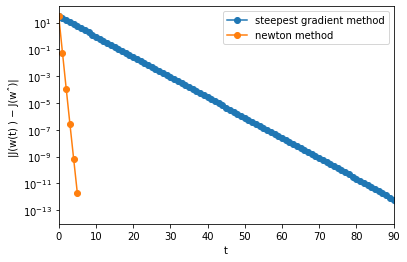

In [14]:
plt.yscale('log')
plt.xlabel('t')
plt.ylabel('|J(w(t) ) − J(wˆ)| ')

tmp1 = arr_sgm[len(arr_sgm)-1]
arr_sgm -= tmp1*np.ones((len(arr_sgm)))
arr_sgm = np.delete(arr_sgm,len(arr_sgm)-1)
plt.plot(np.arange(0, len(arr_sgm), 1), arr_sgm,marker="o",label="steepest gradient method")

tmp2 = arr_newton[len(arr_newton)-1]
arr_newton -= tmp2*np.ones((len(arr_newton)))
arr_newton = np.delete(arr_newton,len(arr_newton)-1)
plt.plot(np.arange(0, len(arr_newton), 1), arr_newton,marker="o",label="newton method")
plt.xlim(0, 90)
plt.legend()